<a href="https://colab.research.google.com/github/Daghem/Game/blob/main/giorno3_ai_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_rows = 500

# Creiamo variabili con una logica interna
importi = np.random.uniform(500, 10000, n_rows)
categorie = np.random.choice(['Consulenza', 'Servizi', 'Software', 'Hardware'], n_rows)

# Creiamo il ritardo basato su Importo e Categoria + un po' di rumore casuale
ritardo_base = (importi / 1000) * 5  # Più è alto l'importo, più sale il ritardo
ritardo_categoria = np.where(categorie == 'Consulenza', 20, 0) # La consulenza aggiunge 20gg
rumore = np.random.normal(0, 5, n_rows)

giorni_ritardo = ritardo_base + ritardo_categoria + rumore
target = np.where(giorni_ritardo > 35, 1, 0) # Target: 1 se > 35 giorni

df_real = pd.DataFrame({
    'Importo': importi,
    'Categoria': categorie,
    'Ritardo_Previsto': target
})
print(df_real)
print(df_real['Ritardo_Previsto'].value_counts()) # Vediamo quanti "cattivi" pagatori abbiamo

         Importo   Categoria  Ritardo_Previsto
0    4058.131129     Servizi                 0
1    9531.785911    Software                 1
2    7453.942447  Consulenza                 1
3    6187.255600  Consulenza                 1
4    1982.177084  Consulenza                 0
..           ...         ...               ...
495  3856.846166  Consulenza                 0
496  6044.733063    Hardware                 1
497  1238.479051    Hardware                 0
498  9756.750673    Software                 1
499  9869.002073    Software                 1

[500 rows x 3 columns]
Ritardo_Previsto
0    277
1    223
Name: count, dtype: int64


In [ ]:
# Crea colonne separate per ogni categoria
df_final = pd.get_dummies(df_real, columns=['Categoria'])

print(df_final.head())

       Importo  Ritardo_Previsto  Categoria_Consulenza  Categoria_Hardware  \
0  4058.131129                 0                 False               False   
1  9531.785911                 1                 False               False   
2  7453.942447                 1                  True               False   
3  6187.255600                 1                  True               False   
4  1982.177084                 0                  True               False   

   Categoria_Servizi  Categoria_Software  
0               True               False  
1              False                True  
2              False               False  
3              False               False  
4              False               False  


Nuova Accuratezza: 90.00%


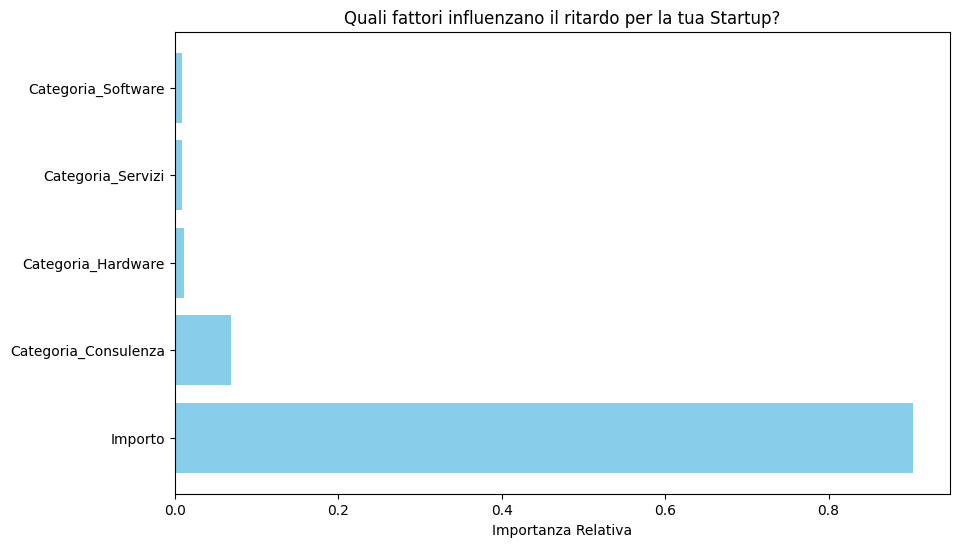

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Prepariamo i dati finali (assicurati che df_final sia stato creato sopra)
X = df_final.drop('Ritardo_Previsto', axis=1)
y = df_final['Ritardo_Previsto']

# 2. Split dei dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Creazione e addestramento del Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# 4. Risultati
accuratezza = forest.score(X_test, y_test)
print(f"Nuova Accuratezza: {accuratezza * 100:.2f}%")

# 5. Visualizzazione dell'importanza delle caratteristiche
importanze = forest.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importanze, color='skyblue')
plt.xlabel('Importanza Relativa')
plt.title('Quali fattori influenzano il ritardo per la tua Startup?')
plt.show()

In [ ]:
!pip install transformers

# Carichiamo un modello specifico per l'italiano (sentit-it)
analizzatore_it = pipeline("sentiment-analysis", model="MilaNLProc/feel-it-italian-sentiment")

testi = [
    "Il servizio è stato eccellente e la fattura è corretta.",
    "Non sono affatto soddisfatto, il pagamento è in ritardo per colpa vostra!"
]

risultati = analizzatore_it(testi)

for testo, ris in zip(testi, risultati):
    print(f"Testo: {testo} \nRisultato: {ris['label']} (Confidenza: {ris['score']:.2f})\n")

config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/794k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/299 [00:00<?, ?B/s]

Device set to use cpu


Testo: Il servizio è stato eccellente e la fattura è corretta. 
Risultato: positive (Confidenza: 1.00)

Testo: Non sono affatto soddisfatto, il pagamento è in ritardo per colpa vostra! 
Risultato: negative (Confidenza: 1.00)



In [ ]:
# Installa la libreria necessaria
!pip install pdfplumber

import pdfplumber

# Sostituisci 'tuo_file.pdf' con il nome del file che hai caricato
file_path = 'Esempio-di-fattura-accompagnatoria.pdf'

with pdfplumber.open(file_path) as pdf:
    # Estraiamo il testo da tutte le pagine
    testo_completo = ""
    for pagina in pdf.pages:
        testo_completo += pagina.extract_text()

print("--- Testo Estratto ---")
print(testo_completo)

--- Testo Estratto ---
(cid:1) (cid:1)(cid:2)(cid:3)(cid:4)(cid:5)(cid:6)(cid:7)(cid:8)(cid:9)(cid:10)(cid:6)(cid:4)(cid:11)(cid:12)(cid:2)(cid:9)(cid:11)(cid:1)(cid:8)(cid:7)(cid:11)(cid:8)(cid:13)(cid:9)
(cid:14)(cid:8)(cid:7)(cid:9)(cid:15)(cid:6)(cid:9)(cid:16)(cid:8)(cid:13)(cid:4)(cid:11)(cid:2)(cid:10)(cid:8)(cid:9)(cid:17)(cid:8)(cid:15)(cid:15)(cid:8)(cid:9)(cid:13)(cid:4)(cid:6)(cid:18)(cid:14)(cid:8)(cid:9)(cid:17)(cid:11)(cid:9)(cid:19)(cid:20)(cid:6)(cid:15)(cid:11)(cid:4)(cid:21)(cid:9)
(cid:8)(cid:9)(cid:11)(cid:15)(cid:9)(cid:17)(cid:2)(cid:22)(cid:20)(cid:18)(cid:8)(cid:10)(cid:4)(cid:9)(cid:18)(cid:6)(cid:10)(cid:6)(cid:16)(cid:8)(cid:18)(cid:8)(cid:10)(cid:4)(cid:9)
(cid:1)
(cid:1)(cid:2)(cid:3)(cid:4)(cid:5)(cid:6)(cid:7)(cid:8)(cid:6)(cid:7)(cid:9)(cid:10)(cid:11)(cid:9)(cid:9)(cid:11)(cid:4)(cid:3)(cid:12)(cid:9)(cid:13)(cid:7)(cid:8)(cid:3)(cid:14)(cid:14)(cid:3)(cid:7)(cid:2)(cid:9)(cid:11)(cid:4)(cid:5)(cid:3)(cid:7)
(cid:1) (cid:1)
(cid:7)
(cid:8)
(cid:8)
(cid

In [ ]:
import pdfplumber

file_path = 'Esempio-di-fattura-accompagnatoria.pdf'

with pdfplumber.open(file_path) as pdf:
    # Proviamo a estrarre le tabelle invece del testo libero
    first_page = pdf.pages[0]
    table = first_page.extract_table()

    if table:
        for row in table:
            # Puliamo i dati dai None
            print([cell.replace('\n', ' ') if cell else "" for cell in row])
    else:
        print("Nessuna tabella trovata con il metodo standard. Prova l'estrazione testo pulita:")
        print(first_page.extract_text(x_tolerance=1))

Nessuna tabella trovata con il metodo standard. Prova l'estrazione testo pulita:
(cid:1) (cid:1)(cid:2)(cid:3)(cid:4)(cid:5)(cid:6)(cid:7)(cid:8)(cid:9)(cid:10)(cid:6)(cid:4)(cid:11)(cid:12)(cid:2)(cid:9)(cid:11)(cid:1)(cid:8)(cid:7)(cid:11)(cid:8)(cid:13)(cid:9)
(cid:14)(cid:8)(cid:7)(cid:9)(cid:15)(cid:6)(cid:9)(cid:16)(cid:8)(cid:13)(cid:4)(cid:11)(cid:2)(cid:10)(cid:8)(cid:9)(cid:17)(cid:8)(cid:15)(cid:15)(cid:8)(cid:9)(cid:13)(cid:4)(cid:6)(cid:18)(cid:14)(cid:8)(cid:9)(cid:17)(cid:11)(cid:9)(cid:19)(cid:20)(cid:6)(cid:15)(cid:11)(cid:4)(cid:21)(cid:9)
(cid:8)(cid:9)(cid:11)(cid:15)(cid:9)(cid:17)(cid:2)(cid:22)(cid:20)(cid:18)(cid:8)(cid:10)(cid:4)(cid:9)(cid:18)(cid:6)(cid:10)(cid:6)(cid:16)(cid:8)(cid:18)(cid:8)(cid:10)(cid:4)(cid:9)
(cid:1)
(cid:1)(cid:2)(cid:3)(cid:4)(cid:5)(cid:6)(cid:7)(cid:8)(cid:6)(cid:7)(cid:9)(cid:10)(cid:11)(cid:9)(cid:9)(cid:11)(cid:4)(cid:3)(cid:12)(cid:9)(cid:13)(cid:7)(cid:8)(cid:3)(cid:14)(cid:14)(cid:3)(cid:7)(cid:2)(cid:9)(cid:11)(cid:4)(cid:5)(

In [ ]:
# Installazione del motore OCR e di Poppler
!apt-get install -y tesseract-ocr
!apt-get install -y poppler-utils
!apt-get install -y libtesseract-dev

# Installazione delle librerie Python
!pip install pytesseract pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.12).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 1 not upgraded.
Need to get 3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.5 [

In [ ]:
import pytesseract
from pdf2image import convert_from_path
import os

# 1. Converti il PDF in una lista di immagini (una per pagina)
file_path = 'Fattura.pdf'
pagine_immagini = convert_from_path(file_path)

print(f"Documento caricato: {len(pagine_immagini)} pagine trovate.")

# 2. Configura Tesseract per l'italiano (opzionale, aggiungi -l ita se installato)
# Per ora usiamo il default, ma forziamo la lettura dei blocchi di testo
testo_estratto = ""

for i, immagine in enumerate(pagine_immagini):
    print(f"Analisi pagina {i+1}...")
    # OCR sull'immagine
    testo = pytesseract.image_to_string(immagine, lang='ita+eng')
    testo_estratto += f"--- PAGINA {i+1} ---\n{testo}\n"

# 3. Mostra il risultato
print("\n--- RISULTATO OCR ---")
print(testo_estratto)

Documento caricato: 6 pagine trovate.
Analisi pagina 1...
Analisi pagina 2...
Analisi pagina 3...
Analisi pagina 4...
Analisi pagina 5...
Analisi pagina 6...

--- RISULTATO OCR ---
--- PAGINA 1 ---
Software nativo iSeries
per la gestione delle stampe di qualita

A mn (0) C e il document management
pp

Esempi di trattamento delle stampe

 

\

he
-@Q-

Esempio 1
we FATTURA ACCOMPAGNATORIA

Il documento proposto nell’esempio é una Fattura Accompagnatoria, che veniva_originariamente
stampato utilizzando stampanti a impatto con moduli continui multicopia prefincati; esso si caratterizza per
lorientamento orizzontale, la scarsa leggibilita delle informazioni e l’esiguita dell’area destinata alla stampa
dei dati di dettaglio (le “righe articolo”).

Validoc ha consentito di sostituire l’impiego della modulistica prefincata, migliorando nel contempo
l'aspetto e la comprensibilita del documento senza alcuna necessita di intervenire sul programma di stampa
del Cliente.

Per cominciare, l’intero 